#  **Membuat Model Dengan Decision Tree**

**Nama : Marisah Lofiana**

**NIM : 1227050068**

**Kelas : Praktikum Pembelajaean Mesin B**

## Klasifikasi Tumor ganas atau jinak Berdasarkaan Karakteristik Media Sel Kanker

**Link Kaggle:** https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data 

**Informasi Dataset:**

- Kolom Fitur :

    - radius_mean

    - texture_mean

    - perimeter_mean

    - area_mean

    - smoothness_mean

    - compactness_mean

    - concavity_mean

    - concave points_mean

    - symmetry_mean

    - fractal_dimension_mean

- Kolom Target:

    - diagnosis

        - M = Malignant (ganas)

        - B = Benign (jinak)

- Jumlah Data: 569 sampel pasien

In [52]:
# Loading library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
def load_cancer_data():
    df = pd.read_csv('breast-cancer.csv')  # Pastikan file ada di direktori kerja
    return df
cancer = load_cancer_data()
cancer.describe().T  # Transpose supaya lebih enak dibaca

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [54]:

# Tampilkan 10 data pertama
print(cancer.head(10))
print(cancer)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

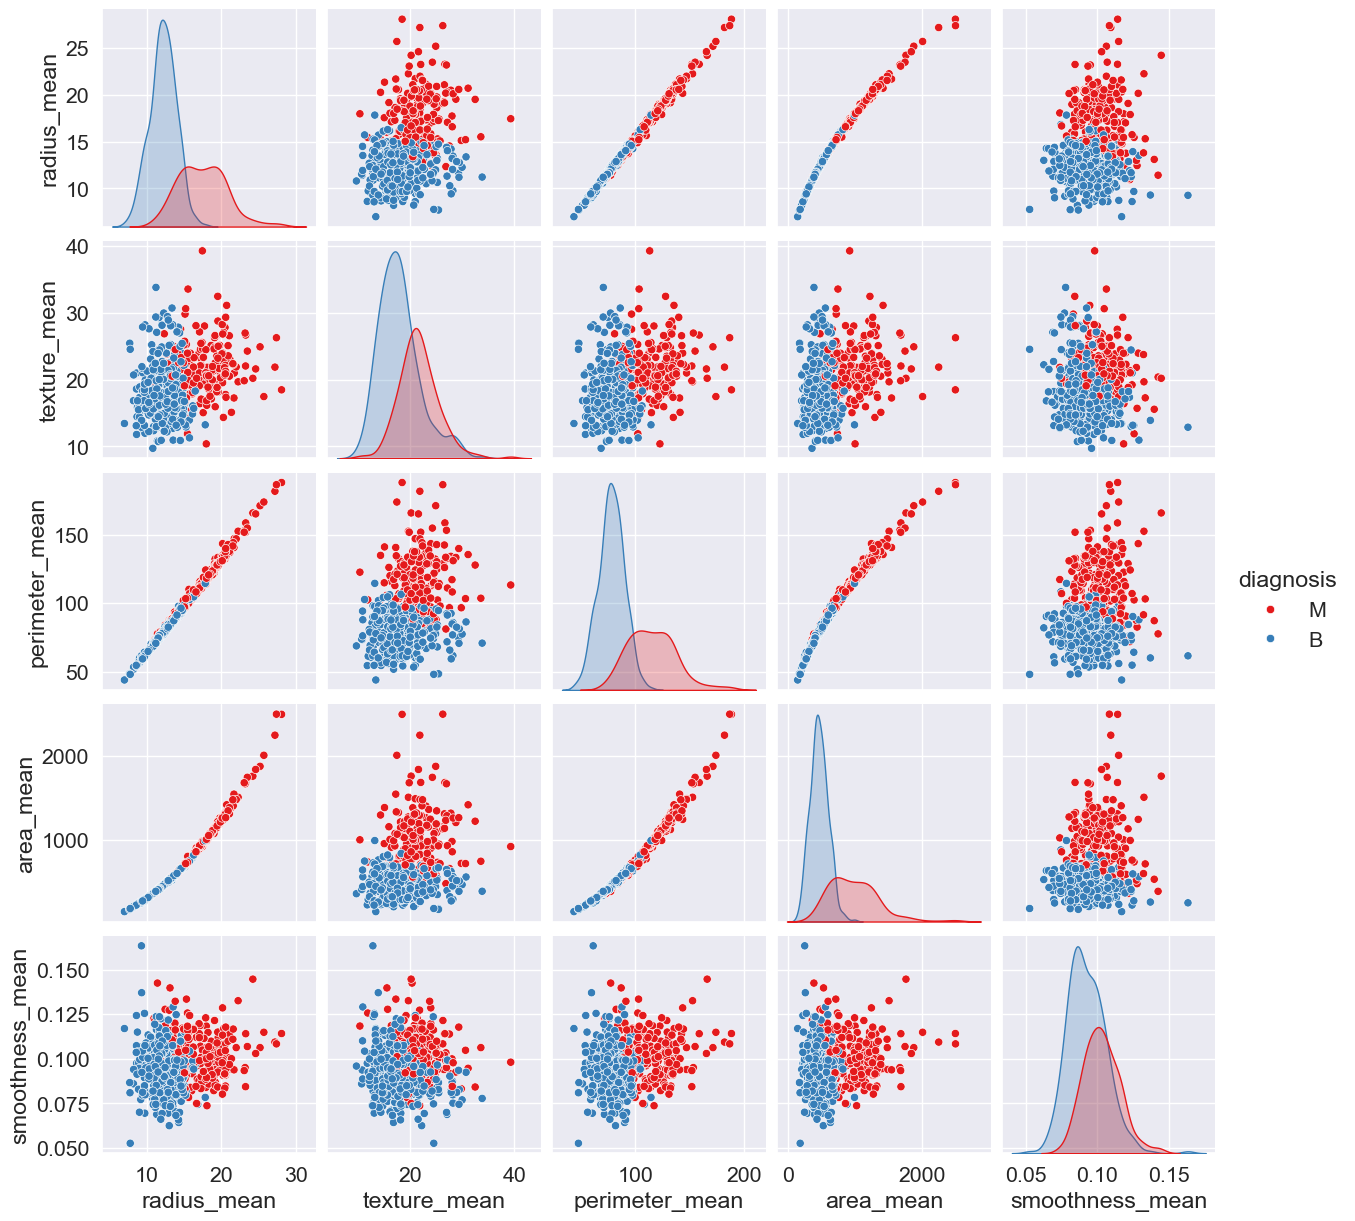

In [55]:
# Memilih beberapa fitur dengan korelasi tinggi terhadap 'quality'
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

# Visualisasi pairplot
sns.pairplot(cancer[selected_features], hue='diagnosis', palette='Set1')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan target (y)
X = cancer.drop('diagnosis', axis=1)  # Semua kolom kecuali 'diagnosis'
y = cancer['diagnosis']  # Target: diagnosis (M/B)

# Split data menjadi training dan testing (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Tampilkan jumlah data training
print(f'Jumlah data training: {len(X_train)}')


Jumlah data training: 398


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encoding label diagnosis: M = 1 (Malignant), B = 0 (Benign)
label_encoder = LabelEncoder()
cancer['diagnosis_encoded'] = label_encoder.fit_transform(cancer['diagnosis'])

# Memisahkan fitur dan target
X = cancer.drop(['diagnosis', 'diagnosis_encoded'], axis=1)  # Fitur tanpa label
y = cancer['diagnosis_encoded']  # Target diagnosis encoded

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Model klasifikasi (Random Forest)
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

           B       0.98      0.97      0.98       112
           M       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



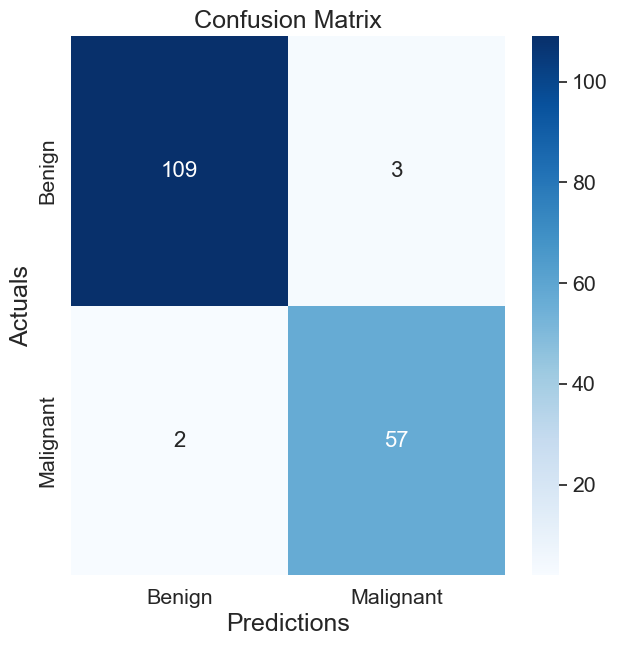

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       112
   Malignant       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [58]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # 0 = Benign, 1 = Malignant
fig, ax = plt.subplots(figsize=(7, 7))

sns.set(font_scale=1.4)  # Font size for labels
sns.heatmap(cm, ax=ax, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'],
            annot_kws={"size": 16})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

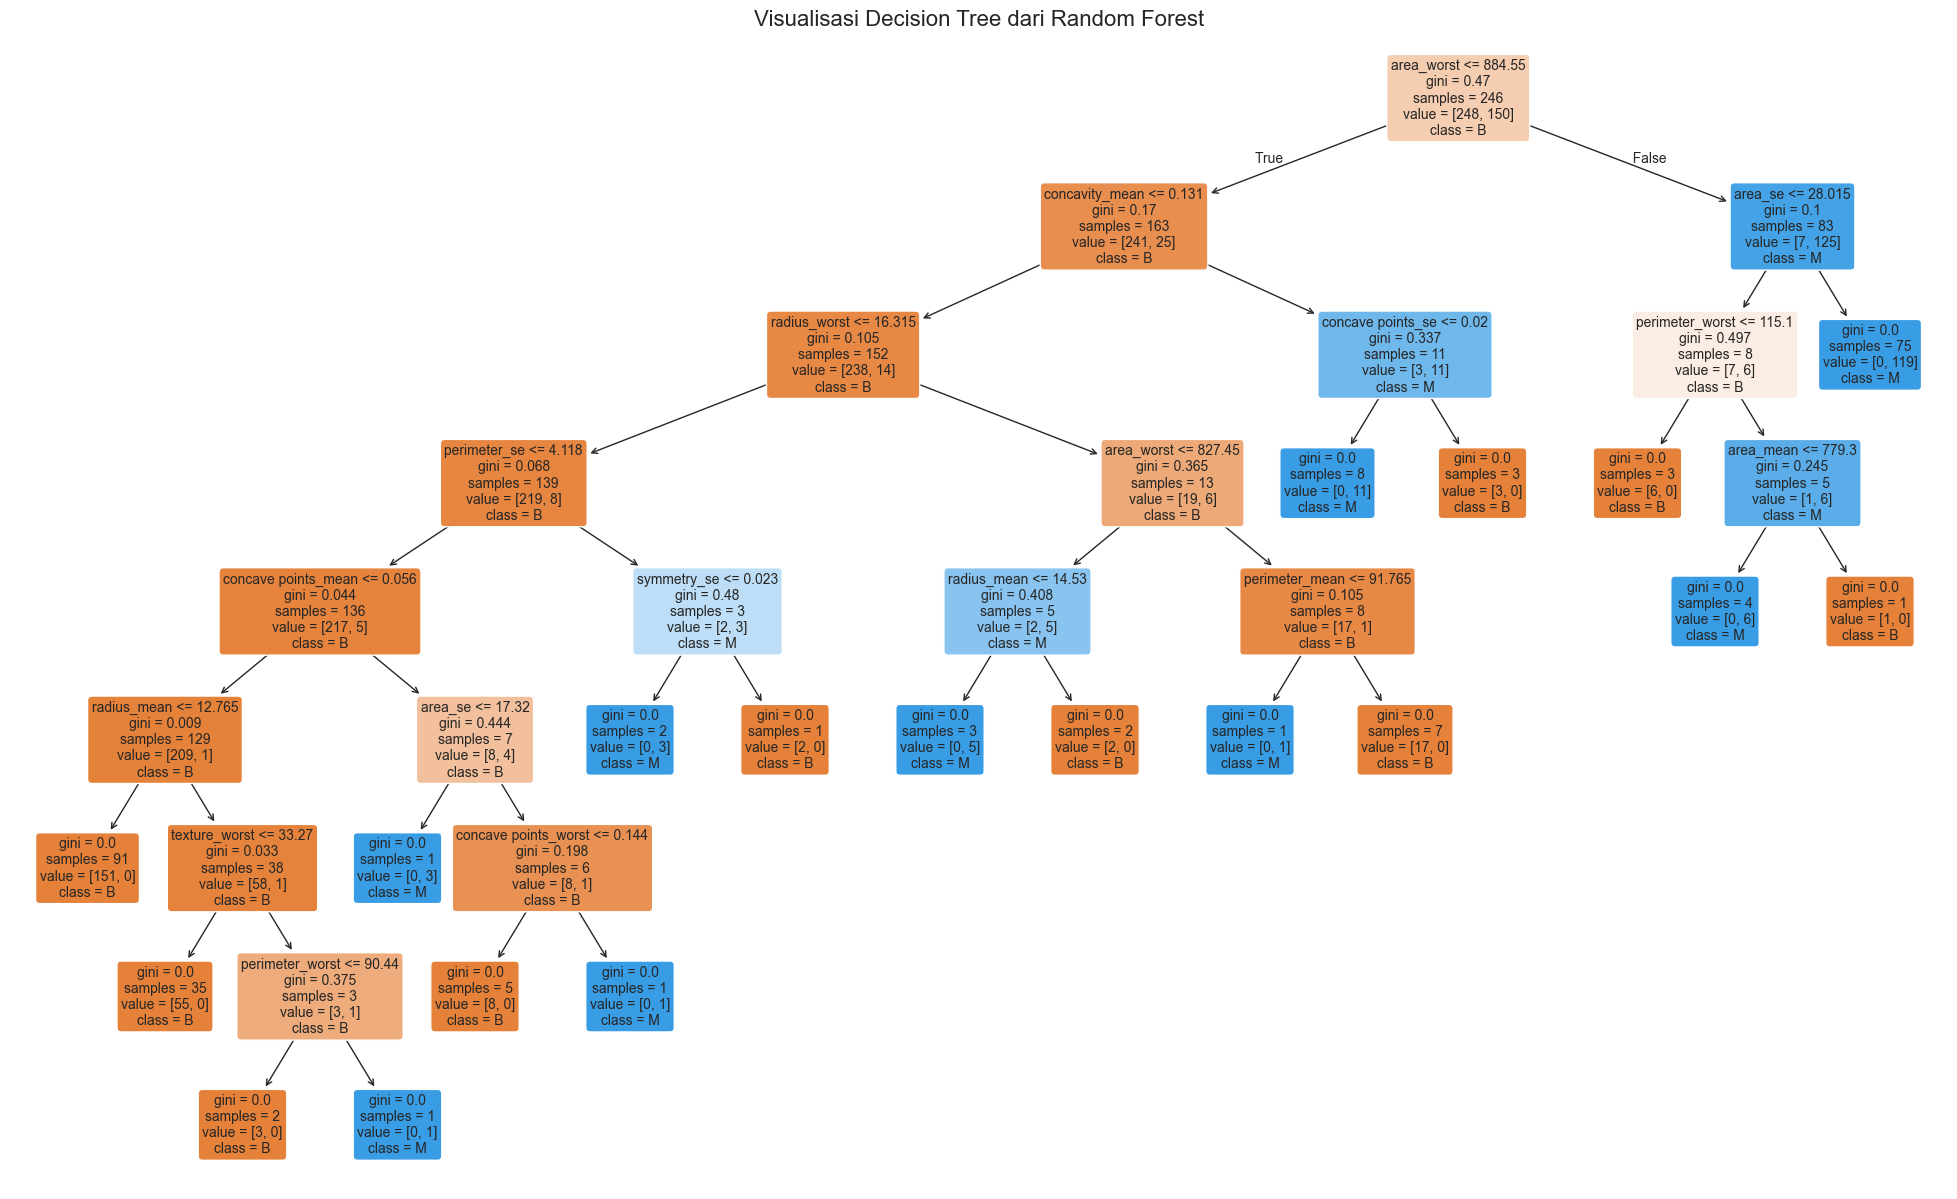

In [59]:
from sklearn import tree

# Ambil nama-nama kolom fitur dari X
features = X.columns.tolist()

# Visualisasi salah satu decision tree dari RandomForest
fig, ax = plt.subplots(figsize=(25, 15))
tree.plot_tree(model.estimators_[0],  # Salah satu pohon dalam Random Forest
               feature_names=features,
               class_names=label_encoder.classes_,  # ['B', 'M'] = ['Benign', 'Malignant']
               filled=True, rounded=True,
               fontsize=10)
plt.title("Visualisasi Decision Tree dari Random Forest", fontsize=16)
plt.show()

In [ ]:
# Data baru (di luar data training/testing)
test_data = {
    'radius_mean': 14.0,
    'texture_mean': 20.0,
    'perimeter_mean': 90.0,
    'area_mean': 600.0,
    'smoothness_mean': 0.09,
    'compactness_mean': 0.08,
    'concavity_mean': 0.05,
    'concave points_mean': 0.04,
    'symmetry_mean': 0.18,
    'fractal_dimension_mean': 0.06
}

# Pastikan urutan fitur sama seperti pada saat pelatihan
feature_order = X.columns.tolist()

# Ubah ke DataFrame
prediction_input_df = pd.DataFrame([test_data])

# Prediksi menggunakan model
prediction = model.predict(prediction_input_df[feature_order])
label = label_encoder.inverse_transform(prediction)  # Decode kembali hasil prediksi ke label aslinya

print("Prediksi diagnosis kanker:", label[0])